In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
from sklearn.tree import DecisionTreeClassifier , plot_tree




In [2]:
class DecisionStump:
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.value_left = None
        self.value_right = None

    def fit(self, X, y):
        best_gain = -1
        for feature_index in range (X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:,feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask],y[right_mask]
                if len(left_y) and len(right_y):
                    left_weight = len(left_y) / len(y)
                    right_weghit= 1 - left_weight
                    gain = self._entropy(y) - (left_weight * self._entropy(left_y)+right_weghit*self._entropy(right_y))
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = feature_index
                        self.threshold = threshold
                        self.value_left = np.bincount(left_y).argmax()
                        self.value_right = np.bincount(right_y).argmax()

    def predict(self,X):
        return np.where(X[:,self.feature] <= self.threshold, self.value_left,self.value_right)
    def _entropy(self,y):
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])
    



In [3]:
iris = load_iris()
X, y = iris.data, iris.target

print(f"Iris features: {iris. feature_names}")
print(f"Iris target: {iris.target_names}")

Iris features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris target: ['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y.flatten(),test_size=0.2,random_state=42)
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")


Shape of X_train: (120, 4), y_train: (120,)
Shape of X_test: (30, 4), y_test: (30,)


In [5]:
stump = DecisionStump()
stump.fit(X_train, y_train)

stump_predictions = stump.predict(X_test)

print(f"Decision Stump Accuracy: {accuracy_score(y_test, stump_predictions):.3f}")
print(f"Decision stump F1-score: {f1_score(y_test, stump_predictions, average='weighted')}")


Decision Stump Accuracy: 0.633
Decision stump F1-score: 0.5195402298850574


Sklearn DT Accuracy: 0.967
Sklearn DT f1-Score:0.966


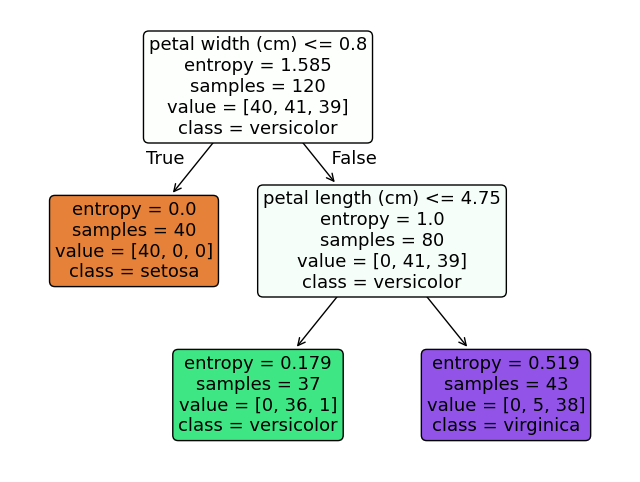

In [7]:
dt_sklearn = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_sklearn.fit(X_train,y_train)

dt_skl_predictions = dt_sklearn.predict(X_test)
print(f"Sklearn DT Accuracy: {accuracy_score(y_test, dt_skl_predictions):.3f}")
print(f"Sklearn DT f1-Score:{f1_score(y_test, dt_skl_predictions, average="weighted"):.3f}")
plt.figure(figsize=(8,6))
plt.title("Decision Tree Visualization - sklearn")
plot_tree(dt_sklearn, feature_names=list(iris.feature_names), class_names = list(iris.target_names), filled = True , rounded= True )
plt.show()
